شرکتی شما را استخدام کرده تا داده هایی که دیتا آنلیزور شرکت به صورت محرمانه در آورده را تحلیل کنید دیتاهای مورد نیاز گذاشته شده

استفاده کنید catboost راهنمایی: از کتابخانه

یک عکس را به صورت واتر مارک روی عکسی جدید چاپ کرده و گوشه های آن را پیدا کنید

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [7]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188318.0,294135.982561,169336.084867,1.000000,147748.250000,294539.500000,440680.500000,587633.000000
cont1,188318.0,0.493861,0.187640,0.000016,0.346090,0.475784,0.623912,0.984975
cont2,188318.0,0.507188,0.207202,0.001149,0.358319,0.555782,0.681761,0.862654
cont3,188318.0,0.498918,0.202105,0.002634,0.336963,0.527991,0.634224,0.944251
cont4,188318.0,0.491812,0.211292,0.176921,0.327354,0.452887,0.652072,0.954297
cont5,188318.0,0.487428,0.209027,0.281143,0.281143,0.422268,0.643315,0.983674
cont6,188318.0,0.490945,0.205273,0.012683,0.336105,0.440945,0.655021,0.997162
cont7,188318.0,0.484970,0.178450,0.069503,0.350175,0.438285,0.591045,1.000000
cont8,188318.0,0.486437,0.199370,0.236880,0.312800,0.441060,0.623580,0.980200
cont9,188318.0,0.485506,0.181660,0.000080,0.358970,0.441450,0.566820,0.995400


In [11]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,125546.0,294067.153442,170098.335649,4.000000,146414.250000,294306.000000,441800.000000,587634.000000
cont1,125546.0,0.494447,0.187961,0.000016,0.347403,0.475784,0.626630,0.984975
cont2,125546.0,0.506939,0.206837,0.001149,0.358319,0.555782,0.681761,0.862654
cont3,125546.0,0.498255,0.201746,0.002634,0.336963,0.527991,0.634224,0.944251
cont4,125546.0,0.492334,0.210815,0.176921,0.327354,0.452887,0.652072,0.956046
cont5,125546.0,0.487640,0.209119,0.281143,0.281143,0.422268,0.643315,0.983107
cont6,125546.0,0.492188,0.205574,0.012683,0.336105,0.441525,0.659261,0.997162
cont7,125546.0,0.485945,0.178650,0.069503,0.352087,0.438893,0.591284,1.000000
cont8,125546.0,0.487401,0.199549,0.236880,0.317960,0.441060,0.629180,0.982800
cont9,125546.0,0.486015,0.182134,0.000080,0.358970,0.441450,0.568890,0.995400


CatBoost is a gradient boosting machine learning algorithm that is used for classification and regression tasks. It was developed by Yandex, a Russian search engine company, and was released as an open-source software in 2017.

CatBoost is an ensemble learning method that combines multiple decision trees to make predictions. It is based on the gradient boosting framework and uses a technique called "ordered boosting", which can handle categorical features in the data set more effectively than traditional gradient boosting algorithms.

One of the main advantages of CatBoost is its ability to handle categorical features without requiring any pre-processing or one-hot encoding, which can be time-consuming and resource-intensive. This can be especially useful in real-world applications where data sets often contain a mix of categorical and continuous features.

Overall, CatBoost is a powerful and flexible machine learning algorithm that can be used for a wide range of tasks, including image and text classification, recommendation systems, and fraud detection, among others

In [12]:
df_train.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [11]:
df_test.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
Length: 131, dtype: int64

In [13]:
df_train.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

In [13]:
df_test.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont10    float64
cont11    float64
cont12    float64
cont13    float64
cont14    float64
Length: 131, dtype: object

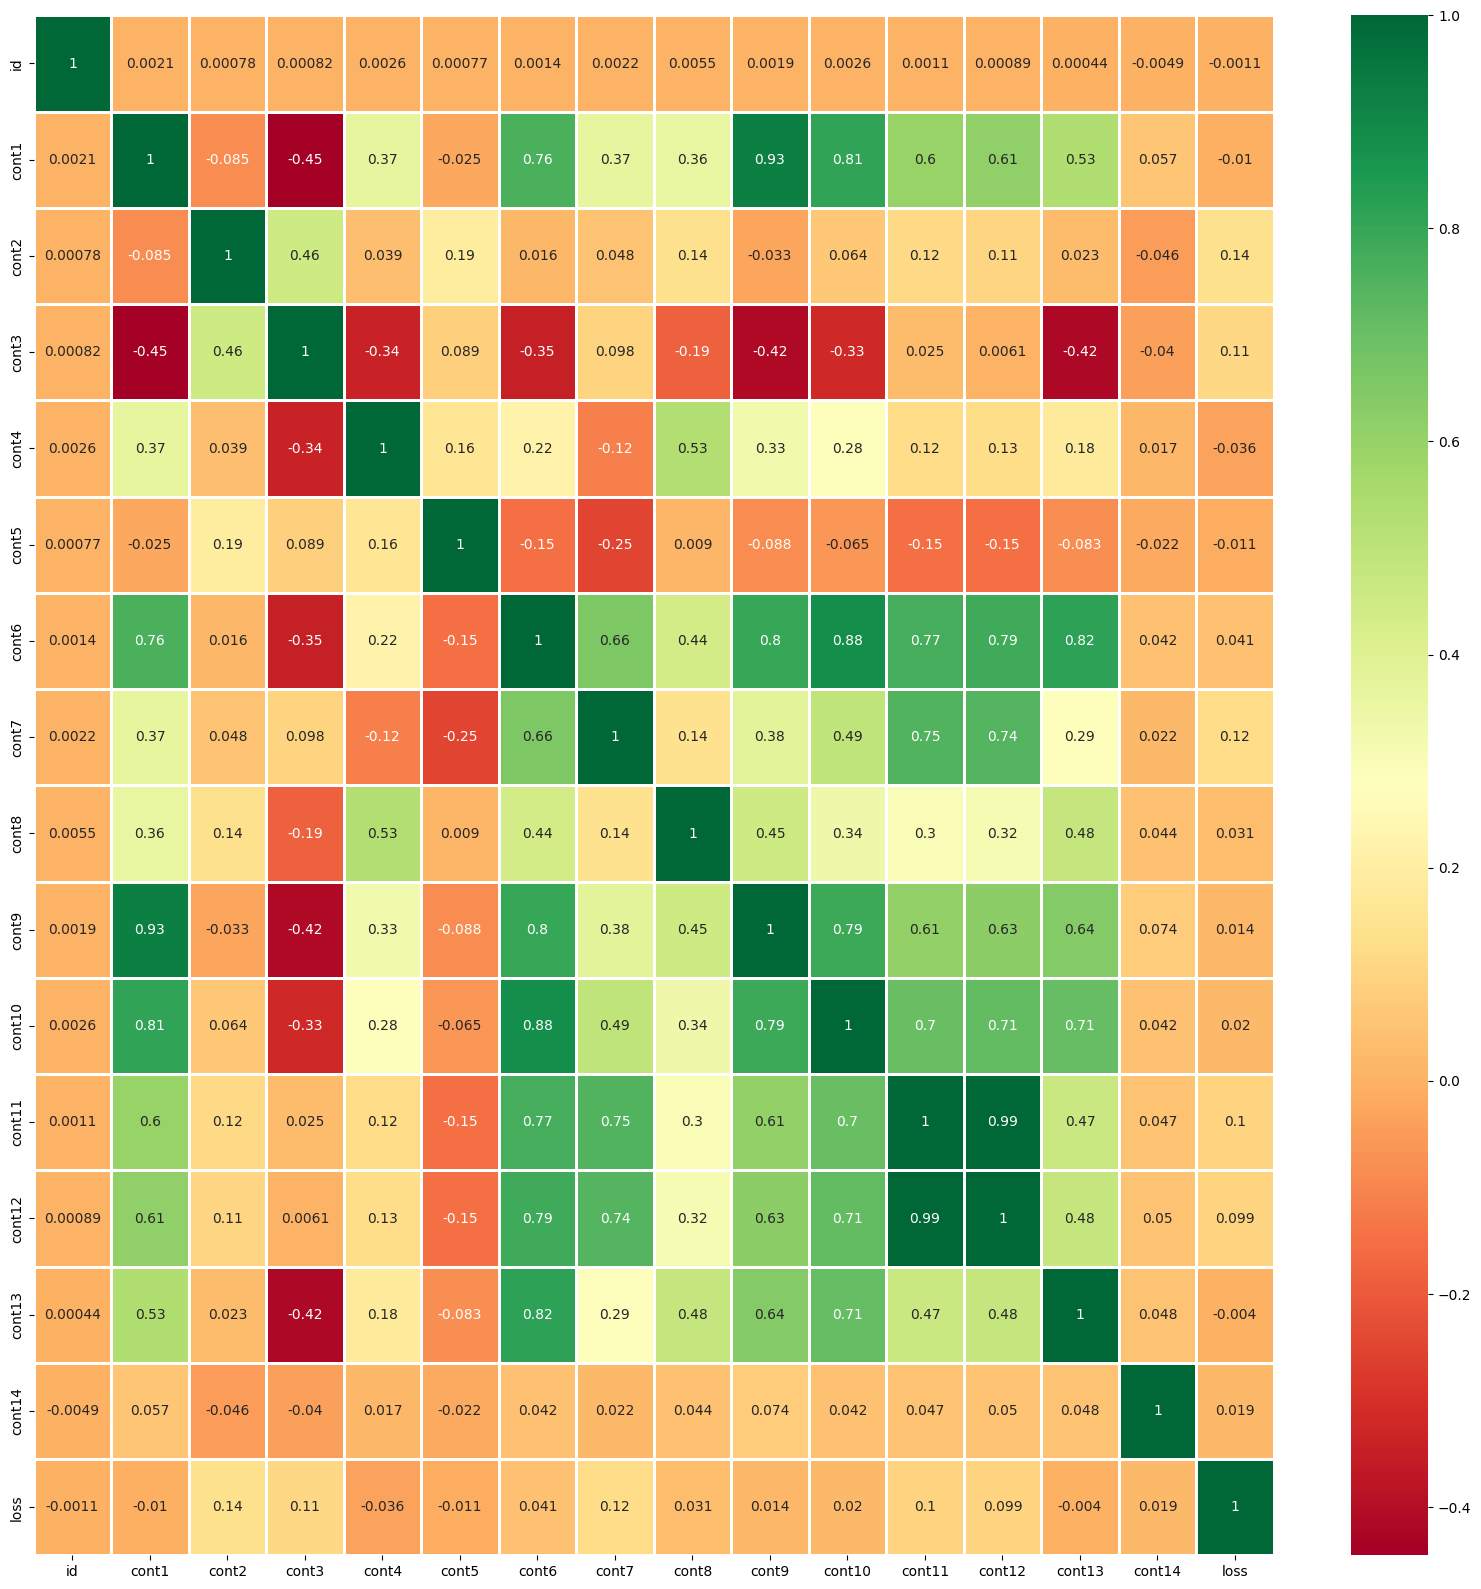

In [14]:
plt.figure(figsize = (20,20))
ax= sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

Check for missing value

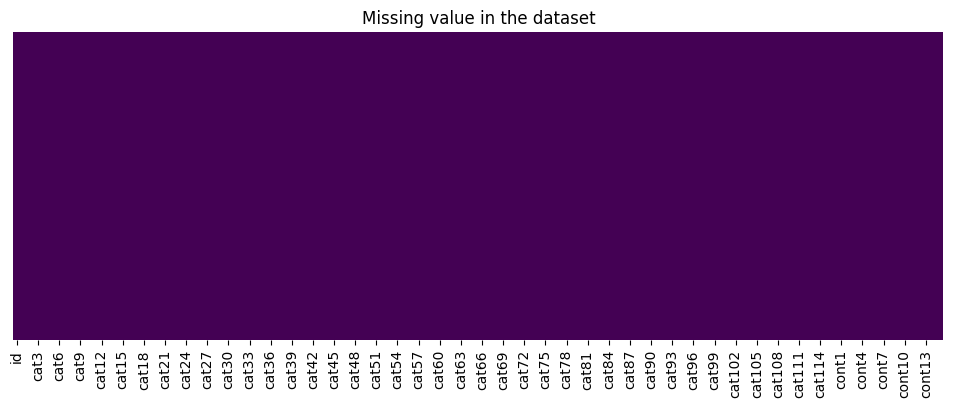

In [18]:
plt.figure(figsize=(12,4))
sns.heatmap(df_train.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

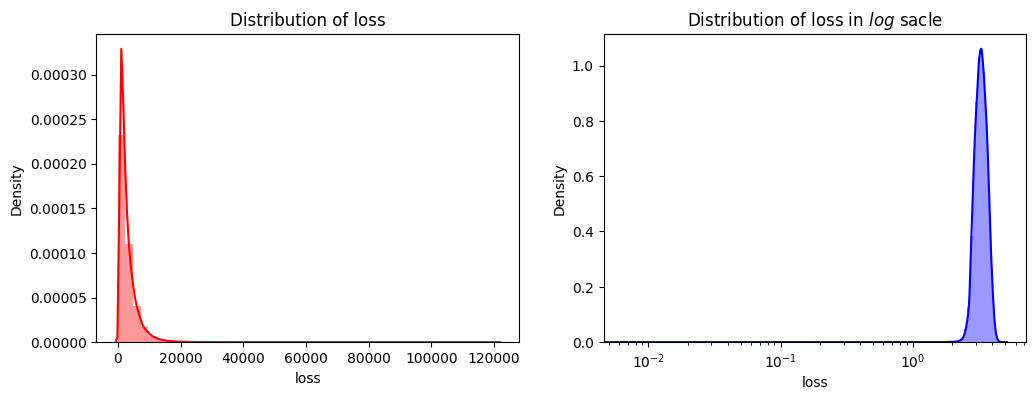

In [20]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df_train['loss'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of loss')

ax=f.add_subplot(122)
sns.distplot(np.log10(df_train['loss']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of loss in $log$ sacle')
ax.set_xscale('log');

In [16]:
!pip install catboost

     -------------------------------------- 73.9/73.9 MB 564.1 kB/s eta 0:00:00
     -------------------------------------- 15.2/15.2 MB 569.4 kB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 395.7 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip install category_encoders

     -------------------------------------- 81.2/81.2 kB 227.4 kB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 kB 325.5 kB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 531.4 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [26]:
# X_train = df_train.drop('loss', axis=1)
# y_train = df_train['loss']
# X_test = df_test
# y_test = df_test['']

In [43]:
X = df_train.drop('loss', axis = 1)
y = df_train['loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=3)

In [17]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()

In [44]:
cbe_encoder.fit(X_train, y_train)
train_cbe = cbe_encoder.transform(X_train)
test_cbe = cbe_encoder.transform(X_test)

In [36]:
train_cbe

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,3408.088895,3800.094823,2902.22051,3488.384698,2814.650135,3259.914706,2908.94504,2975.558908,3827.611464,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,2,3408.088895,3800.094823,2902.22051,2826.828471,2814.650135,3259.914706,2908.94504,2975.558908,3827.611464,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,5,3408.088895,3800.094823,2902.22051,2826.828471,3464.003199,3259.914706,2908.94504,2975.558908,3827.611464,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,10,1915.222514,3800.094823,2902.22051,3488.384698,2814.650135,3259.914706,2908.94504,2975.558908,3827.611464,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,11,3408.088895,3800.094823,2902.22051,3488.384698,2814.650135,3259.914706,2908.94504,2975.558908,3827.611464,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,3408.088895,3800.094823,2902.22051,2826.828471,2814.650135,3259.914706,2908.94504,2975.558908,3827.611464,...,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216
188314,587624,3408.088895,2454.145308,2902.22051,2826.828471,2814.650135,2519.694587,2908.94504,2975.558908,2512.013770,...,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872
188315,587630,3408.088895,3800.094823,2902.22051,2826.828471,2814.650135,3259.914706,2908.94504,4028.902457,3827.611464,...,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888
188316,587632,3408.088895,3800.094823,2902.22051,2826.828471,2814.650135,3259.914706,2908.94504,2975.558908,3827.611464,...,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707


In [38]:
test_cbe

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,3408.088895,3800.094823,2902.22051,2826.828471,2814.650135,3259.914706,2908.945040,2975.558908,3827.611464,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,3408.088895,3800.094823,2902.22051,3488.384698,2814.650135,3259.914706,2908.945040,2975.558908,3827.611464,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,3408.088895,3800.094823,2902.22051,3488.384698,3464.003199,3259.914706,8193.951149,2975.558908,3827.611464,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,3408.088895,2454.145308,2902.22051,2826.828471,3464.003199,3259.914706,2908.945040,2975.558908,2512.013770,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,1915.222514,2454.145308,2902.22051,2826.828471,2814.650135,2519.694587,2908.945040,2975.558908,2512.013770,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,587617,3408.088895,2454.145308,2902.22051,3488.384698,2814.650135,3259.914706,2908.945040,2975.558908,2512.013770,...,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,587621,3408.088895,2454.145308,2902.22051,2826.828471,3464.003199,2519.694587,2908.945040,4028.902457,2512.013770,...,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,587627,1915.222514,3800.094823,2902.22051,2826.828471,3464.003199,3259.914706,2908.945040,2975.558908,3827.611464,...,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,587629,3408.088895,2454.145308,2902.22051,2826.828471,2814.650135,2519.694587,2908.945040,4028.902457,2512.013770,...,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542


In [45]:
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, 
                          loss_function='RMSE')
model.fit(train_cbe, y_train, verbose=False)

In [47]:
y_predict = model.predict(test_cbe)

In [64]:
print("mean_squared_error :",mean_squared_error(y_test, y_predict))
print("r2:" ,metrics.r2_score(y_test, y_predict))
print('Check for overfitting and underfitting')
print('Training set score:',model.score(train_cbe, y_train)*100)
print('Test set score:',model.score(test_cbe,y_test)*100)

mean_squared_error : 3750906.626925022
r2: 0.5639806041763928
Check for overfitting and underfitting
Training set score: 67.92200059881385
Test set score: 56.398060417639286


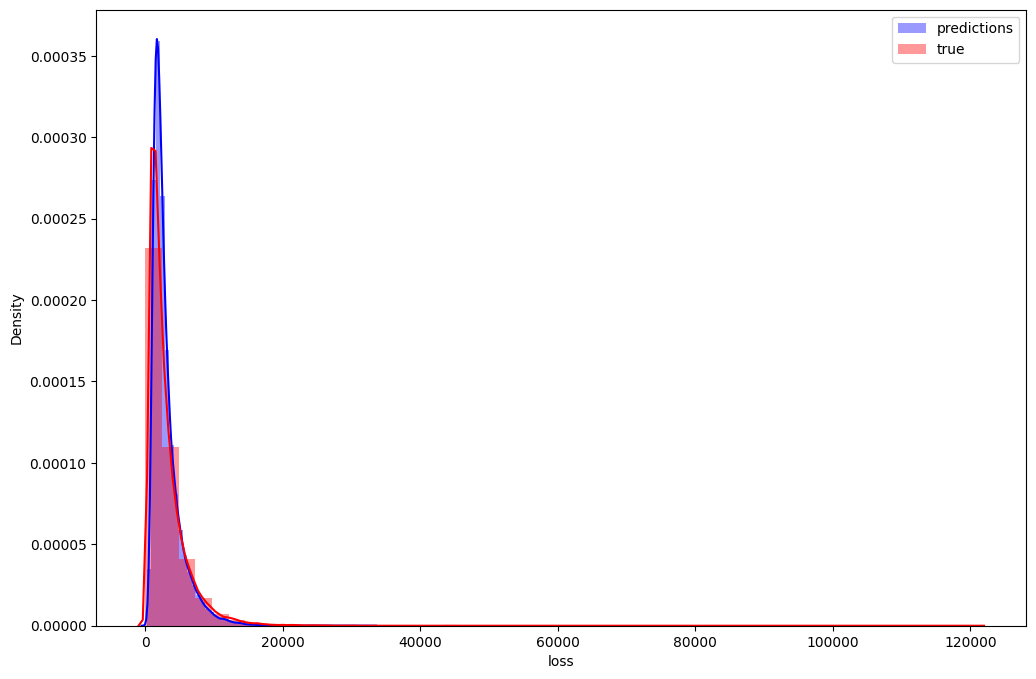

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
bins = None
sns.distplot(y_predict, ax=ax, color="blue", label="predictions", bins=bins)
sns.distplot(y_test, ax=ax, color="red", label="true", bins=bins)
ax.legend()

In [67]:
sclr = StandardScaler()
train_s = sclr.fit_transform(train_cbe)
test_s= sclr.transform(test_cbe)
train_s.shape, test_s.shape

((131822, 131), (56496, 131))

In [69]:
models = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, 
                          loss_function='RMSE')
models.fit(train_s, y_train, verbose=False)
y_preds = model.predict(test_s)

In [72]:
print("mean_squared_error :",mean_squared_error(y_test, y_preds))
print("r2:" ,metrics.r2_score(y_test, y_preds))
print('Check for overfitting and underfitting')
print('Training set score:',model.score(train_s, y_train)*100)
print('Test set score:',model.score(test_s,y_test)*100)

mean_squared_error : 14179951.016698629
r2: -0.6483304678202186
Check for overfitting and underfitting
Training set score: -67.51190269062464
Test set score: -64.83304678202187


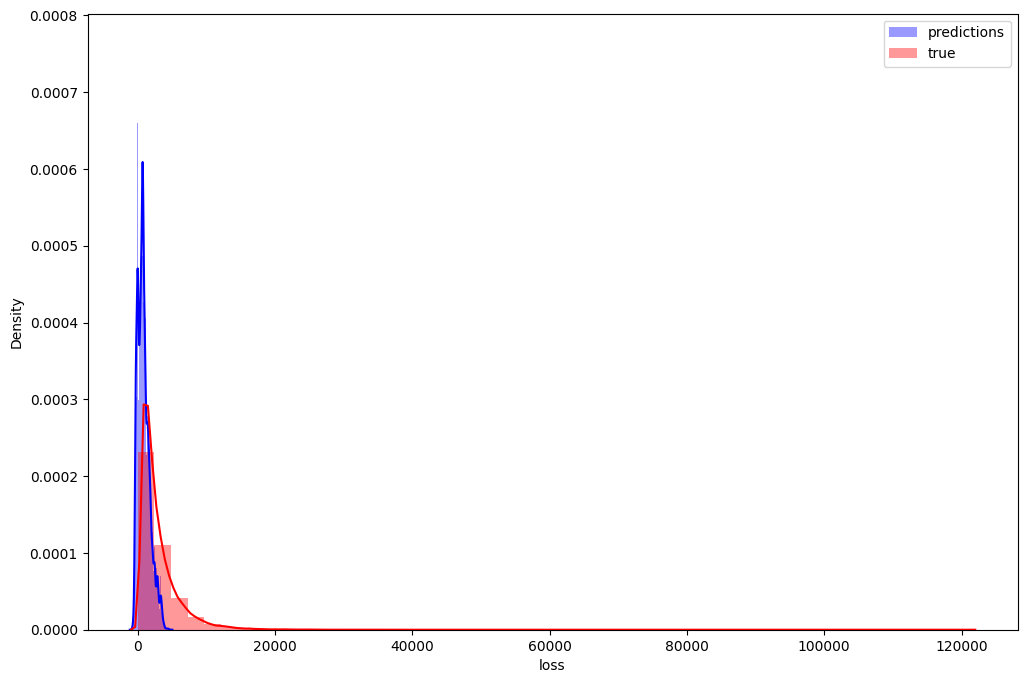

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
bins = None
sns.distplot(y_preds, ax=ax, color="blue", label="predictions", bins=bins)
sns.distplot(y_test, ax=ax, color="red", label="true", bins=bins)
ax.legend()

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
dt=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)
dt.fit(train_s, y_train)
y_preddt = model.predict(test_s)

In [77]:
print("mean_squared_error :",mean_squared_error(y_test, y_preddt))
print("r2:" ,metrics.r2_score(y_test, y_preddt))
print('Check for overfitting and underfitting')
print('Training set score:',model.score(train_s, y_train)*100)
print('Test set score:',model.score(test_s,y_test)*100)

mean_squared_error : 14179951.016698629
r2: -0.6483304678202186
Check for overfitting and underfitting
Training set score: -67.51190269062464
Test set score: -64.83304678202187


In [ ]:
# import cv2
# img = cv2.imread('chicko.JPG')
# watermark = cv2.imread("W.ch.JPG")

In [ ]:
# percent_of_scaling = 20
# new_width = int(img.shape[1] * percent_of_scaling/100)
# new_height = int(img.shape[0] * percent_of_scaling/100)
# new_dim = (new_width, new_height)
# resized_img = cv2.resize(img, new_dim, interpolation=cv2.INTER_AREA)

# wm_scale = 40
# wm_width = int(watermark.shape[1] * wm_scale/100)
# wm_height = int(watermark.shape[0] * wm_scale/100)
# wm_dim = (wm_width, wm_height)

In [ ]:
# resized_wm = cv2.resize(watermark, wm_dim, interpolation=cv2.INTER_AREA)

In [ ]:
# h_img, w_img, _ = resized_img.shape
# center_y = int(h_img/2)
# center_x = int(w_img/2)
# h_wm, w_wm, _ = resized_wm.shape
# top_y = center_y - int(h_wm/2)
# left_x = center_x - int(w_wm/2)
# bottom_y = top_y + h_wm
# right_x = left_x + w_wm

In [ ]:
# roi = resized_img[top_y:bottom_y, left_x:right_x]
# result = cv2.addWeighted(roi, 1, resized_wm, 0.3, 0)
# resized_img[top_y:bottom_y, left_x:right_x] = result

# filename = 'Watermakred_Image.jpg'
# cv2.imwrite(filename, resized_img)
# cv2.imshow("Resized Input Image", resized_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()